# Import Python Libraries
## Libraries Used
##### Pandas
Data manipulation and analysis
##### MatPlotLib Pyplot
2D plotting
##### Numpy
Supports large, multi-dimensional arrays and matrix manipulation and high level mathematical functions on these arrays
##### Scipy Stats
Hypothesis testing

In [1]:
# Perform library imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

### Import Data Dictionaries to Convert Codes to Descriptions

##### Sources

Non-Profit Data - NCSS Data Archive:  https://nccs-data.urban.org/dd2.php?close=1&form=BMF+08/2016

Region Data - ...

##### Non-Profit Method
* Created text files in json format within Visual Studio for each Data Dictionary
* Saved files to Resources folder
* Used pandas library to read the files into dataframes

In [2]:
# Import Level1 Data Dictionary and display : NOTE - This is only a break out of Public Charities
file_Level1 = "./Resources/NCSSDataDictLevel1.txt"
dict_Level1 = pd.read_json(file_Level1)
dict_Level1

,Description1
O,Other Nonprofits
PC,Public Charity
PF,Private Foundation
U,Unknown


In [3]:
# Import Level2 Data Dictionary and display : NOTE - This is only a break out of Public Charities
file_Level2 = "./Resources/NCSSDataDictLevel2.txt"
dict_Level2 = pd.read_json(file_Level2)
dict_Level2

,Description2
M,Mutual Benefit Public Charity
O,Operating Public Charity
S,Supporting Public Charity


In [4]:
# Import Level3 Data Dictionary and display
file_Level3 = "./Resources/NCSSDataDictLevel3.txt"
dict_Level3 = pd.read_json(file_Level3)
dict_Level3

,Description3
AR,"Arts, culture and humanities"
ED,Education
EN,Environment/animals
HE,Health
HS,Human Services
IN,"International, foreign affairs"
MO,Other mutual benefit
MR,Pension and retirement funds
PB,"Public, societal benefit"
RE,Religion related


In [5]:
# Import Level4 Data Dictionary and display
file_Level4 = "./Resources/NCSSDataDictLevel4.txt"
dict_Level4 = pd.read_json(file_Level4)
dict_Level4

,Description4
,Unknown
A,"Arts, Culture, and Humanities"
B,Education
C,"Environmental Quality, Protection, and Beautif..."
D,Animal-Related
E,Health
F,"Mental Health, Crisis Intervention"
G,"Diseases, Disorders, Medical Disciplines"
H,Medical Research
I,"Crime, Legal Related"


### Import IRS Business Master Files

##### Source
NCSS Data Archive
https://nccs-data.urban.org/data.php?ds=bmf

##### File
bmf.bm1812.csv

In [6]:
# specify file name
gov_data_file = "../../bookish-lamp/2018_BMF.csv"

# import file
gov_data = pd.read_csv(gov_data_file, low_memory=False)

# Data Cleaning Phase
### Steps

#### Review Raw Data
* Determine how many values in each column
* Ensure the data imported well - view the dataframe

#### Eliminate Data not Required for Analysis
1) Remove unwanted columns - Do this step first to avoid deleting a row where one of these columns has invalid data and the columns needed have valid data

2) Remove NaN or missing values

3) Removed unwanted rows (States that do not map to a region)

4) Other?

In [7]:
# check the number of data rows per column
gov_data.count()

EIN          1499450
SEC_NAME      404909
FRCD         1499450
SUBSECCD     1499450
TAXPER       1240366
ASSETS       1223112
INCOME       1223112
NAME         1499450
ADDRESS      1499450
CITY         1499450
STATE        1498426
NTEECONF        4518
NTEEFINAL    1499450
NAICS        1495191
ZIP5         1499353
OUTNCCS      1499450
OUTREAS         3021
RULEDATE     1499450
FIPS         1496643
FNDNCD       1499450
PMSA          506362
MSA_NECH     1175676
CASSETS       542418
CFINSRC       542418
CTAXPER       542418
CTOTREV       542418
ACCPER       1240366
RANDNUM      1499450
NTEECC       1499450
NTEE1        1499450
LEVEL4       1499450
LEVEL1       1499450
NTMAJ10      1499450
MAJGRPB      1499450
LEVEL3       1499450
LEVEL2       1499450
NTMAJ12      1499450
NTMAJ5       1499450
FILER        1499450
ZFILER       1499450
dtype: int64

In [8]:
# display the data read in
gov_data

,EIN,SEC_NAME,FRCD,SUBSECCD,TAXPER,ASSETS,INCOME,NAME,ADDRESS,CITY,...,LEVEL4,LEVEL1,NTMAJ10,MAJGRPB,LEVEL3,LEVEL2,NTMAJ12,NTMAJ5,FILER,ZFILER
0,19818,3514,60,3,NaN,NaN,NaN,PALMER SECOND BAPTIST CHURCH,1050 THORNDIKE ST,PALMER,...,X,PC,RE,X,RE,O,RE,OT,N,N
1,29215,NaN,60,3,NaN,NaN,NaN,ST GEORGE CATHEDRAL,523 E BROADWAY,SOUTH BOSTON,...,X,PC,RE,X,RE,O,RE,OT,N,N
2,260049,NaN,60,3,NaN,NaN,NaN,CORINTH BAPTIST CHURCH,PO BOX 92,HOSFORD,...,X,PC,RE,X,RE,O,RE,OT,N,N
3,490336,NaN,60,3,NaN,NaN,NaN,EASTSIDE BAPTIST CHURCH,PO BOX 296,LABELLE,...,X,PC,RE,X,RE,O,RE,OT,N,N
4,587764,NaN,60,3,NaN,NaN,NaN,IGLESIA BETHESDA INC,157 ANDOVER ST,LOWELL,...,X,PC,RE,X,RE,O,RE,OT,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499445,996089401,NaN,1,3,201803.0,670570.0,160467.0,TOYO SAKUMOTO CHARITABLE TR,PO BOX 3170,HONOLULU,...,T,PF,PU,T,ZC,S,PU,OT,Y,N
1499446,996165005,145 PHILOTESIAN REBEKAH LODGE,20,8,201712.0,0.0,0.0,INDEPENDENT ORDER OF ODD FELLOWS,PO BOX 76,CUPERTINO,...,Y,O,MU,Y,MO,M,MU,OT,Y,Y
1499447,998010224,NaN,1,3,201612.0,737906.0,177689.0,HAWAII FOUNDATION FOR THE BLIND,225 LILIUOKALANI AVE APT 5D,HONOLULU,...,P,PF,HU,P,HS,O,HU,HU,Y,N
1499448,998997790,YOUNG RIDERS,20,3,201708.0,0.0,0.0,CHAMPAIGN COUNTY EXTENSION EDUCATION FOUNDATION,1120 N WEBSTER ST,TAYLORVILLE,...,B,PC,ED,B,ZA,S,ED,ED,Y,Y


In [9]:
# identify the indices of rows we want to eliminate
indexNames = gov_data[gov_data["LEVEL1"]=="O"].index

In [10]:
len(indexNames)

349167

In [11]:
gov_data.drop(indexNames, inplace=True)

In [12]:
gov_data

,EIN,SEC_NAME,FRCD,SUBSECCD,TAXPER,ASSETS,INCOME,NAME,ADDRESS,CITY,...,LEVEL4,LEVEL1,NTMAJ10,MAJGRPB,LEVEL3,LEVEL2,NTMAJ12,NTMAJ5,FILER,ZFILER
0,19818,3514,60,3,NaN,NaN,NaN,PALMER SECOND BAPTIST CHURCH,1050 THORNDIKE ST,PALMER,...,X,PC,RE,X,RE,O,RE,OT,N,N
1,29215,NaN,60,3,NaN,NaN,NaN,ST GEORGE CATHEDRAL,523 E BROADWAY,SOUTH BOSTON,...,X,PC,RE,X,RE,O,RE,OT,N,N
2,260049,NaN,60,3,NaN,NaN,NaN,CORINTH BAPTIST CHURCH,PO BOX 92,HOSFORD,...,X,PC,RE,X,RE,O,RE,OT,N,N
3,490336,NaN,60,3,NaN,NaN,NaN,EASTSIDE BAPTIST CHURCH,PO BOX 296,LABELLE,...,X,PC,RE,X,RE,O,RE,OT,N,N
4,587764,NaN,60,3,NaN,NaN,NaN,IGLESIA BETHESDA INC,157 ANDOVER ST,LOWELL,...,X,PC,RE,X,RE,O,RE,OT,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499443,996087839,CARTWRIGHT RACHAEL,3,3,201712.0,10109.0,22000.0,KEIKI KOHOLA PROJECT,1330 SABAL LAKES RD,DELRAY BEACH,...,U,PF,PU,U,PB,S,PU,OT,Y,N
1499444,996088748,PACIFIC CENTURY TR TTEE,1,3,201803.0,377564.0,64829.0,UNOYO KOJIMA TRUST,PO BOX 3170,HONOLULU,...,T,PF,PU,T,ZC,S,PU,OT,Y,N
1499445,996089401,NaN,1,3,201803.0,670570.0,160467.0,TOYO SAKUMOTO CHARITABLE TR,PO BOX 3170,HONOLULU,...,T,PF,PU,T,ZC,S,PU,OT,Y,N
1499447,998010224,NaN,1,3,201612.0,737906.0,177689.0,HAWAII FOUNDATION FOR THE BLIND,225 LILIUOKALANI AVE APT 5D,HONOLULU,...,P,PF,HU,P,HS,O,HU,HU,Y,N


In [13]:
# identify the indices of rows we want to eliminate
indexNames = gov_data[gov_data["LEVEL1"]=="U"].index

In [14]:
len(indexNames)

30

In [15]:
gov_data.drop(indexNames, inplace=True)

In [16]:
gov_data.head()

,EIN,SEC_NAME,FRCD,SUBSECCD,TAXPER,ASSETS,INCOME,NAME,ADDRESS,CITY,...,LEVEL4,LEVEL1,NTMAJ10,MAJGRPB,LEVEL3,LEVEL2,NTMAJ12,NTMAJ5,FILER,ZFILER
0,19818,3514,60,3,NaN,NaN,NaN,PALMER SECOND BAPTIST CHURCH,1050 THORNDIKE ST,PALMER,...,X,PC,RE,X,RE,O,RE,OT,N,N
1,29215,NaN,60,3,NaN,NaN,NaN,ST GEORGE CATHEDRAL,523 E BROADWAY,SOUTH BOSTON,...,X,PC,RE,X,RE,O,RE,OT,N,N
2,260049,NaN,60,3,NaN,NaN,NaN,CORINTH BAPTIST CHURCH,PO BOX 92,HOSFORD,...,X,PC,RE,X,RE,O,RE,OT,N,N
3,490336,NaN,60,3,NaN,NaN,NaN,EASTSIDE BAPTIST CHURCH,PO BOX 296,LABELLE,...,X,PC,RE,X,RE,O,RE,OT,N,N
4,587764,NaN,60,3,NaN,NaN,NaN,IGLESIA BETHESDA INC,157 ANDOVER ST,LOWELL,...,X,PC,RE,X,RE,O,RE,OT,N,N


In [17]:
gov_data.dropna(axis=0, how='any', subset=["ASSETS", "INCOME","LEVEL1", "NAME", "STATE"], inplace=True)

In [18]:
gov_data = gov_data[["EIN","ASSETS","INCOME","NAME","ADDRESS","CITY","STATE","ZIP5","LEVEL1","LEVEL2","LEVEL3","LEVEL4"]]

In [19]:
gov_data

,EIN,ASSETS,INCOME,NAME,ADDRESS,CITY,STATE,ZIP5,LEVEL1,LEVEL2,LEVEL3,LEVEL4
18,10002847,0.0,0.0,HULLS COVE NEIGHBORHOOD ASSOCIATION,PO BOX 126,HULLS COVE,ME,4644.0,PC,O,PB,S
19,10011694,0.0,0.0,MASSACHUSETTS MODERATORS ASSOCIATION,30 SAMUEL PRESCOTT DR,STOW,MA,1775.0,PC,O,PB,S
20,10015091,52489.0,107989.0,HANOVER SOCCER CLUB INC,PO BOX 13,CEDAR KNOLLS,NJ,7927.0,PC,O,HS,N
21,10017496,233819.0,180773.0,AGAMENTICUS YACHT CLUB OF YORK,PO BOX 534,YORK HARBOR,ME,3911.0,PC,O,HS,N
33,10024155,0.0,0.0,BANGOR BAND,647 MAIN STREET,BANGOR,ME,4401.0,PC,O,AR,A
...,...,...,...,...,...,...,...,...,...,...,...,...
1499443,996087839,10109.0,22000.0,KEIKI KOHOLA PROJECT,1330 SABAL LAKES RD,DELRAY BEACH,FL,93035.0,PF,S,PB,U
1499444,996088748,377564.0,64829.0,UNOYO KOJIMA TRUST,PO BOX 3170,HONOLULU,HI,96802.0,PF,S,ZC,T
1499445,996089401,670570.0,160467.0,TOYO SAKUMOTO CHARITABLE TR,PO BOX 3170,HONOLULU,HI,96802.0,PF,S,ZC,T
1499447,998010224,737906.0,177689.0,HAWAII FOUNDATION FOR THE BLIND,225 LILIUOKALANI AVE APT 5D,HONOLULU,HI,96815.0,PF,O,HS,P


In [20]:
gov_data.count()

EIN        891408
ASSETS     891408
INCOME     891408
NAME       891408
ADDRESS    891408
CITY       891408
STATE      891408
ZIP5       891382
LEVEL1     891408
LEVEL2     891408
LEVEL3     891408
LEVEL4     891408
dtype: int64

# Review the Remaining Data
* Display the final data frame
* Run basic statistics on the numeric columns


In [21]:
gov_data.describe()

,EIN,ASSETS,INCOME,ZIP5
count,8.914080e+05,8.914080e+05,8.914080e+05,891382.000000
mean,4.501007e+08,5.560271e+06,3.733421e+06,49563.756665
std,2.390812e+08,1.752903e+08,1.782037e+08,30230.675916
min,1.000285e+07,0.000000e+00,-3.050449e+07,0.000000
25%,2.631331e+08,0.000000e+00,0.000000e+00,22314.000000
50%,4.527022e+08,3.790000e+03,4.860000e+03,46904.000000
75%,5.825405e+08,2.846955e+05,1.976800e+05,77382.000000
max,9.989978e+08,5.207875e+10,7.235283e+10,99950.000000


In [22]:
state_level1 = gov_data.copy()
state_level1

,EIN,ASSETS,INCOME,NAME,ADDRESS,CITY,STATE,ZIP5,LEVEL1,LEVEL2,LEVEL3,LEVEL4
18,10002847,0.0,0.0,HULLS COVE NEIGHBORHOOD ASSOCIATION,PO BOX 126,HULLS COVE,ME,4644.0,PC,O,PB,S
19,10011694,0.0,0.0,MASSACHUSETTS MODERATORS ASSOCIATION,30 SAMUEL PRESCOTT DR,STOW,MA,1775.0,PC,O,PB,S
20,10015091,52489.0,107989.0,HANOVER SOCCER CLUB INC,PO BOX 13,CEDAR KNOLLS,NJ,7927.0,PC,O,HS,N
21,10017496,233819.0,180773.0,AGAMENTICUS YACHT CLUB OF YORK,PO BOX 534,YORK HARBOR,ME,3911.0,PC,O,HS,N
33,10024155,0.0,0.0,BANGOR BAND,647 MAIN STREET,BANGOR,ME,4401.0,PC,O,AR,A
...,...,...,...,...,...,...,...,...,...,...,...,...
1499443,996087839,10109.0,22000.0,KEIKI KOHOLA PROJECT,1330 SABAL LAKES RD,DELRAY BEACH,FL,93035.0,PF,S,PB,U
1499444,996088748,377564.0,64829.0,UNOYO KOJIMA TRUST,PO BOX 3170,HONOLULU,HI,96802.0,PF,S,ZC,T
1499445,996089401,670570.0,160467.0,TOYO SAKUMOTO CHARITABLE TR,PO BOX 3170,HONOLULU,HI,96802.0,PF,S,ZC,T
1499447,998010224,737906.0,177689.0,HAWAII FOUNDATION FOR THE BLIND,225 LILIUOKALANI AVE APT 5D,HONOLULU,HI,96815.0,PF,O,HS,P


# Apply Region Data to the dataset
 
*


# Calculate Statistics by Region: Public Charity vs Private Foundation
* Calculate count, median, mean, min, max, sem

In [23]:
state_level1 = state_level1.groupby(["STATE", "LEVEL1"], as_index=False).aggregate(
    {
        "INCOME":["mean", "sem", "count", "min", "max", "median"],
        "ASSETS":["mean", "sem", "count", "min", "max", "median"]
    }
)
state_level1

STATE LEVEL1        INCOME                                              \
                          mean           sem  count      min           max   
0      AA     PC  0.000000e+00           NaN      1      0.0  0.000000e+00   
1      AE     PC  7.268707e+05  6.340133e+05     21      0.0  1.329001e+07   
2      AK     PC  1.829941e+06  4.558748e+05   2788      0.0  8.759308e+08   
3      AK     PF  3.081849e+06  1.315174e+06    110      0.0  1.320134e+08   
4      AL     PC  1.275886e+06  2.325689e+05  10542      0.0  1.868716e+09   
..    ...    ...           ...           ...    ...      ...           ...   
112    WI     PF  1.612918e+06  2.897912e+05   2375  -6126.0  6.120344e+08   
113    WV     PC  2.150192e+06  4.157335e+05   5007      0.0  1.160407e+09   
114    WV     PF  8.708717e+05  1.505691e+05    353 -30617.0  2.874431e+07   
115    WY     PC  6.374540e+05  1.370712e+05   2399      0.0  2.690173e+08   
116    WY     PF  1.783573e+06  4.317716e+05    286      0.0  9.130250e+07   

                     ASSETS                                                    
       median          mean           sem  count  min           max    median  
0         0.0  0.000000e+00           NaN      1  0.0  0.000000e+00       0.0  
1         0.0  4.598413e+05  3.953394e+05     21  0.0  8.306423e+06       0.0  
2        23.0  2.672440e+06  4.970286e+05   2788  0.0  7.510723e+08       1.0  
3    101937.5  1.029920e+07  6.500200e+06    110  0.0  7.116767e+08  339912.5  
4         0.0  1.963709e+06  2.645897e+05  10542  0.0  1.193380e+09       0.0  
..        ...           ...           ...    ...  ...           ...       ...  
112  150243.0  4.229250e+06  5.070854e+05   2375  0.0  8.494265e+08  586919.0  
113       0.0  2.828019e+06  5.662661e+05   5007  0.0  1.690946e+09       0.0  
114  100762.0  2.889246e+06  4.668270e+05    353  0.0  1.143525e+08  477387.0  
115       0.0  1.383387e+06  3.336089e+05   2399  0.0  6.481097e+08       0.0  
116  138517.5  4.115691e+06  6.646454e+05    286  0.0  1.165312e+08  667078.5  

[117 rows x 14 columns]

# Remove any invalid rows (missing data or NaN)

In [24]:
state_level1.dropna(axis=0, how='any', inplace=True)
state_level1

STATE LEVEL1        INCOME                                              \
                          mean           sem  count      min           max   
1      AE     PC  7.268707e+05  6.340133e+05     21      0.0  1.329001e+07   
2      AK     PC  1.829941e+06  4.558748e+05   2788      0.0  8.759308e+08   
3      AK     PF  3.081849e+06  1.315174e+06    110      0.0  1.320134e+08   
4      AL     PC  1.275886e+06  2.325689e+05  10542      0.0  1.868716e+09   
5      AL     PF  9.482565e+05  1.277176e+05   1094      0.0  8.172473e+07   
..    ...    ...           ...           ...    ...      ...           ...   
112    WI     PF  1.612918e+06  2.897912e+05   2375  -6126.0  6.120344e+08   
113    WV     PC  2.150192e+06  4.157335e+05   5007      0.0  1.160407e+09   
114    WV     PF  8.708717e+05  1.505691e+05    353 -30617.0  2.874431e+07   
115    WY     PC  6.374540e+05  1.370712e+05   2399      0.0  2.690173e+08   
116    WY     PF  1.783573e+06  4.317716e+05    286      0.0  9.130250e+07   

                     ASSETS                                                    
       median          mean           sem  count  min           max    median  
1         0.0  4.598413e+05  3.953394e+05     21  0.0  8.306423e+06       0.0  
2        23.0  2.672440e+06  4.970286e+05   2788  0.0  7.510723e+08       1.0  
3    101937.5  1.029920e+07  6.500200e+06    110  0.0  7.116767e+08  339912.5  
4         0.0  1.963709e+06  2.645897e+05  10542  0.0  1.193380e+09       0.0  
5    102247.5  2.544636e+06  3.112035e+05   1094  0.0  1.770920e+08  382920.5  
..        ...           ...           ...    ...  ...           ...       ...  
112  150243.0  4.229250e+06  5.070854e+05   2375  0.0  8.494265e+08  586919.0  
113       0.0  2.828019e+06  5.662661e+05   5007  0.0  1.690946e+09       0.0  
114  100762.0  2.889246e+06  4.668270e+05    353  0.0  1.143525e+08  477387.0  
115       0.0  1.383387e+06  3.336089e+05   2399  0.0  6.481097e+08       0.0  
116  138517.5  4.115691e+06  6.646454e+05    286  0.0  1.165312e+08  667078.5  

[112 rows x 14 columns]

# Create Two Dataframes by Region:  Public Charities, Private Foundations

In [25]:
# Create a dataframe for Public Charities
state_PC = state_level1[state_level1["LEVEL1"] == "PC"]
state_PC = state_PC.set_index("STATE")
state_PC.head()

LEVEL1        INCOME                                                  \
                      mean            sem  count  min           max median   
STATE                                                                        
AE        PC  7.268707e+05  634013.321381     21  0.0  1.329001e+07    0.0   
AK        PC  1.829941e+06  455874.810920   2788  0.0  8.759308e+08   23.0   
AL        PC  1.275886e+06  232568.933587  10542  0.0  1.868716e+09    0.0   
AP        PC  2.762500e+04   11390.143450     20  0.0  1.552230e+05    0.0   
AR        PC  1.876654e+06  284764.630994   6770  0.0  1.106865e+09    0.0   

             ASSETS                                                  
               mean            sem  count  min           max median  
STATE                                                                
AE     4.598413e+05  395339.423854     21  0.0  8.306423e+06    0.0  
AK     2.672440e+06  497028.560455   2788  0.0  7.510723e+08    1.0  
AL     1.963709e+06  264589.666611  10542  0.0  1.193380e+09    0.0  
AP     1.085865e+04    5760.629510     20  0.0  1.006070e+05    0.0  
AR     2.701117e+06  396800.173488   6770  0.0  1.208407e+09    0.0

In [26]:
# Create a dataframe for Private Foundations
state_PF = state_level1[state_level1["LEVEL1"] == "PF"]
state_PF = state_PF.set_index("STATE")
state_PF.head()

LEVEL1        INCOME                                              \
                      mean           sem count       min           max   
STATE                                                                    
AK        PF  3.081849e+06  1.315174e+06   110       0.0  1.320134e+08   
AL        PF  9.482565e+05  1.277176e+05  1094       0.0  8.172473e+07   
AR        PF  8.221813e+06  5.319360e+06   445  -96310.0  2.328780e+09   
AZ        PF  1.269739e+06  2.103552e+05  1072       0.0  1.556742e+08   
CA        PF  4.119017e+06  4.322736e+05  9922 -771027.0  1.805736e+09   

                       ASSETS                                                   
         median          mean           sem count  min           max    median  
STATE                                                                           
AK     101937.5  1.029920e+07  6.500200e+06   110  0.0  7.116767e+08  339912.5  
AL     102247.5  2.544636e+06  3.112035e+05  1094  0.0  1.770920e+08  382920.5  
AR      68188.0  1.451183e+07  7.581225e+06   445  0.0  3.131554e+09  301791.0  
AZ      79397.5  4.117232e+06  7.517834e+05  1072  0.0  5.410745e+08  361349.0  
CA     102806.0  1.290699e+07  1.863713e+06  9922  0.0  1.039132e+10  415070.0

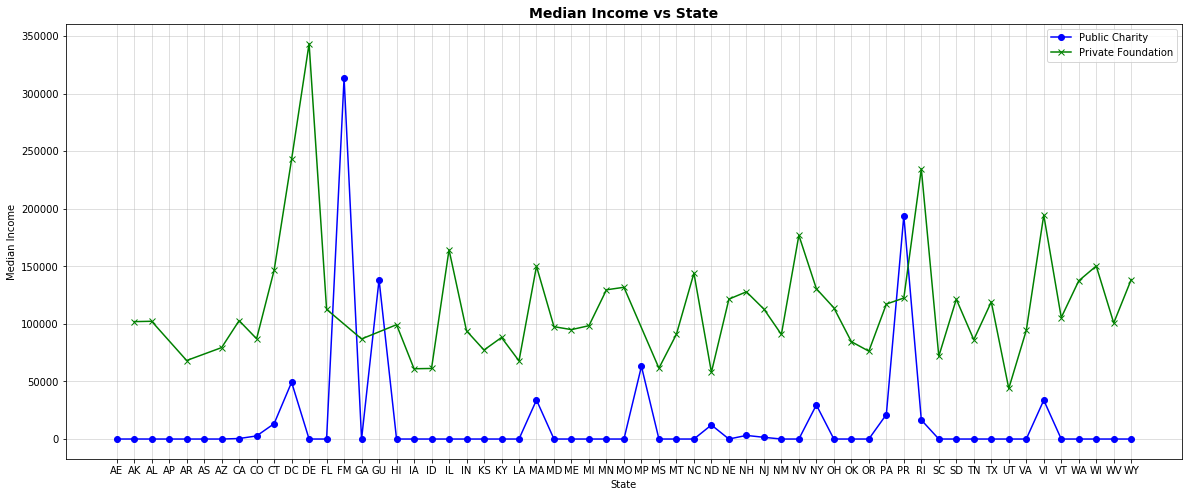

In [27]:
# Generate a plot showing Median Income by State
plt.figure(figsize=(20,8))
plt.plot(state_PC.index, state_PC["INCOME"]["median"], marker='o', color='b', label="Public Charity")
plt.plot(state_PF.index, state_PF["INCOME"]["median"], marker='x', color='g', label="Private Foundation")

# Add title, labels,  legend and grid
plt.title('Median Income vs State', color='k', size=14, weight='bold')
plt.xlabel('State')
plt.ylabel('Median Income')
plt.legend(loc="best")
plt.grid(alpha=0.5)

# Save the Figure
plt.savefig("./Images/MedianIncomebyStateType.png")

# Show the Figure
plt.show()

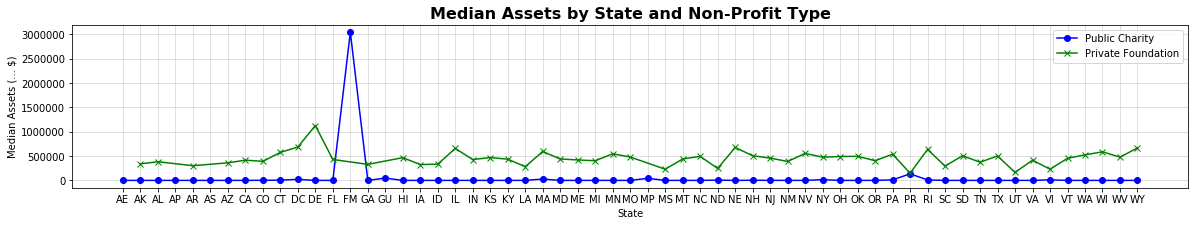

In [28]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(20,3))
plt.plot(state_PC.index, state_PC["ASSETS"]["median"], marker='o', color='b', label="Public Charity")
plt.plot(state_PF.index, state_PF["ASSETS"]["median"], marker='x', color='g', label="Private Foundation")

# Add title, labels,  legend and grid
plt.title('Median Assets by State and Non-Profit Type', color='k', size=16, weight='bold')
plt.xlabel('State')
plt.ylabel('Median Assets (... $)')
plt.legend(loc="best")
plt.grid(alpha=0.5)

# Save the Figure
#plt.savefig("../Images/TumorResponse.png")

# Show the Figure
plt.show()

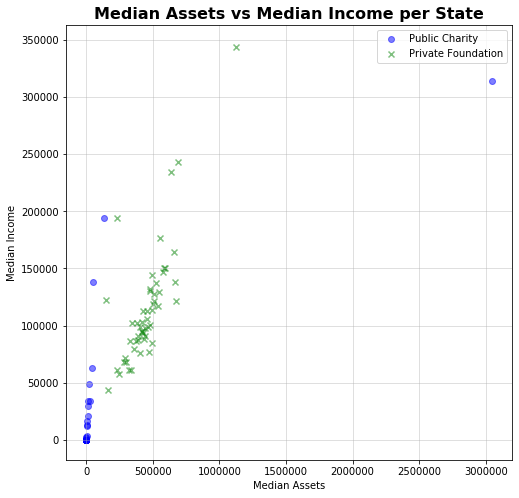

In [29]:
# Plot Median Income vs Median Assets per State
plt.figure(figsize=(8,8))
plt.scatter(state_PC["ASSETS"]["median"], state_PC["INCOME"]["median"], c="b", marker='o', alpha=0.5, label="Public Charity")
plt.scatter(state_PF["ASSETS"]["median"], state_PF["INCOME"]["median"], c="g", marker='x', alpha=0.5, label="Private Foundation")
plt.title(f'Median Assets vs Median Income per State', size=16, weight='bold')
plt.xlabel('Median Assets')
plt.ylabel('Median Income')
plt.grid(alpha=0.5)
plt.legend(loc="best")

# Save the image
plt.savefig("./Images/MedianAssetsvsMedianIncomebyState.png")
plt.show()

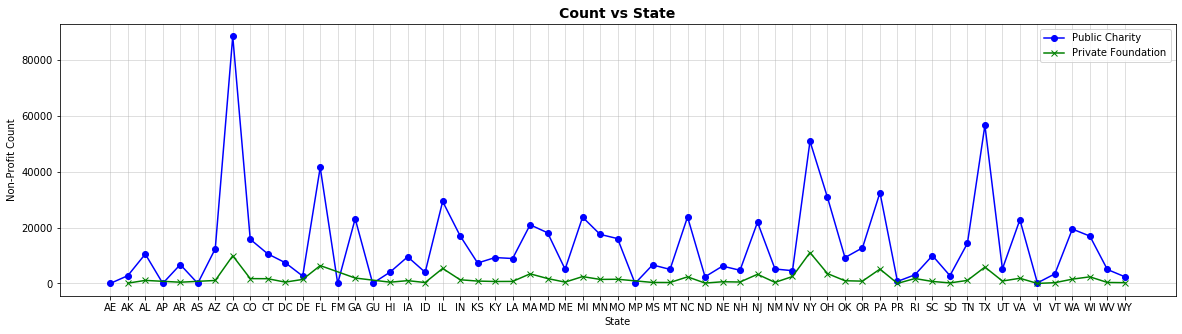

In [30]:
# Generate a plot by count of Public Charities vs Private Foundations per state
plt.figure(figsize=(20,5))
plt.plot(state_PC.index, state_PC["INCOME"]["count"], marker='o', color='b', label="Public Charity")
plt.plot(state_PF.index, state_PF["INCOME"]["count"], marker='x', color='g', label="Private Foundation")

# Add title, labels,  legend and grid
plt.title('Count vs State', color='k', size=14, weight='bold')
plt.xlabel('State')
plt.ylabel('Non-Profit Count')
plt.legend(loc="best")
plt.grid(alpha=0.5)

# Save the Figure
plt.savefig("./Images/CountperStateofPCvsPF.png")

# Show the Figure
plt.show()

# Check Null Hypothesis
1) All states have the same number of Non-Profit Organizations (Public Charities & Private Foundations)

2) Public Charities have the same Income as Private Foundations

3) Median Income is the same for Public Charities and Private Foundations

4) Median Assets is the same for Public Charities and Private Foundations

In [31]:
stats.chisquare(gov_data["STATE"].value_counts())

Power_divergenceResult(statistic=1298643.0452923914, pvalue=0.0)

In [32]:
x_labels1 = gov_data["LEVEL1"].map(dict_Level1["Description1"])
x_labels1

18             Public Charity
19             Public Charity
20             Public Charity
21             Public Charity
33             Public Charity
                  ...        
1499443    Private Foundation
1499444    Private Foundation
1499445    Private Foundation
1499447    Private Foundation
1499448        Public Charity
Name: LEVEL1, Length: 891408, dtype: object

In [33]:
stats.f_oneway(gov_data[gov_data["LEVEL1"] == "PC"]["INCOME"], 
               gov_data[gov_data["LEVEL1"] == "PF"]["INCOME"])

F_onewayResult(statistic=0.031332006215250514, pvalue=0.859501759588856)

In [34]:
gov_data.to_csv(index=False, path_or_buf="gov_data.csv")

In [35]:
stats.f_oneway(state_PC["INCOME"]["median"], 
               state_PF["INCOME"]["median"])

F_onewayResult(statistic=105.89219949166548, pvalue=8.40558929233472e-18)

In [36]:
stats.f_oneway(state_PC["ASSETS"]["median"], 
               state_PF["ASSETS"]["median"])

F_onewayResult(statistic=46.26349437711653, pvalue=5.626218026605068e-10)